# Classifying Credit Loans

### Cassi Mason
### CS379
### Individual Project 3
### 12/08/2024
#### This project implements a machine learning algorithm to predict if a given person applying for a loan will payback or default on the loan. The dataset is the German Credit Risk dataset, a test piece dataset for model evaluation and learning. I used the CSV version from Farukh (2020). Most of my code is also adapted from Farukh (2020). The Machine learning model is a Support Vector Machine (SVM). The accuracy of the model is 0.73. 

## Ingest Data

Use pandas to hold the dataset and look at the data

In [4]:
import pandas as pd

In [7]:
df = pd.read_csv('CreditRiskData.csv')
print(df.head())

   GoodCredit checkingstatus  duration history purpose  amount savings employ  \
0           0            A11         6     A34     A43    1169     A65    A75   
1           1            A12        48     A32     A43    5951     A61    A73   
2           0            A14        12     A34     A46    2096     A61    A74   
3           0            A11        42     A32     A42    7882     A61    A74   
4           1            A11        24     A33     A40    4870     A61    A73   

   installment status  ... residence  property age  otherplans housing cards  \
0            4    A93  ...         4      A121  67        A143    A152     2   
1            2    A92  ...         2      A121  22        A143    A152     1   
2            2    A93  ...         3      A121  49        A143    A152     1   
3            2    A93  ...         4      A122  45        A143    A153     1   
4            3    A93  ...         4      A124  53        A143    A153     2   

    job liable  tele foreign  
0

"GoodCredit" seems to be a categorical variable with values 0 and 1. This is our target variable, if the person paid back (good) or defaulted (bad) on their loan. We need to determine if "0" represents good or bad.

## Explore Dataset

See number of columns, column names, and data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GoodCredit      1000 non-null   int64 
 1   checkingstatus  1000 non-null   object
 2   duration        1000 non-null   int64 
 3   history         1000 non-null   object
 4   purpose         1000 non-null   object
 5   amount          1000 non-null   int64 
 6   savings         1000 non-null   object
 7   employ          1000 non-null   object
 8   installment     1000 non-null   int64 
 9   status          1000 non-null   object
 10  others          1000 non-null   object
 11  residence       1000 non-null   int64 
 12  property        1000 non-null   object
 13  age             1000 non-null   int64 
 14  otherplans      1000 non-null   object
 15  housing         1000 non-null   object
 16  cards           1000 non-null   int64 
 17  job             1000 non-null   object
 18  liable   

No null values in dataset (rangeindex is 1000, and every column has 1000 non-null entries). However, there could be incorrect data, such as 0 when it is unknown. To determine this, we need to know what each column represents and what the values in each column represent (for example, I have no idea what "A11" means in the "checkingstatus" column). Then we can see if every data value makes sense. 

Referring to Farukh (2020) and Hoffman (1994), I found a description of the data, which is listed here:

* **GoodCredit:** if the loan was paid back or not. 0 = bad, 1 = good.
* **checkingstatus:** 4 categories representing different ranges of amounts (in Deutsche Marks (DM), german currency before euro) in the person's checking account. 
  * A11 : empty
  * A12 : 0 to 200
  * A13 : more than 200
  * A14 : no checking account
* **duration:** number of months. Not sure of what. To pay back loan?
* **history:** credit history. 5 different categories. 
  * A30 : no credits taken/ all credits paid back on time
  * A31 : all credits at this bank paid back on time
  * A32 : existing credits paid back on time until now
  * A33 : delay in paying off in the past
  * A34 : critical account/  other credits existing (not at this bank)
* **purpose:** The reason the loan was taken out. 11 different categories. 
  * A40 : car (new)
  * A41 : car (used)
  * A42 : furniture/equipment
  * A43 : radio/television
  * A44 : domestic appliances
  * A45 : repairs
  * A46 : education
  * A47 : vacation
  * A48 : retraining
  * A49 : business
  * A410 : other
* **amount:** The amount the loan was for. Numerical.
* **savings:** 5 categories representing different ranges of amounts in the person's savings account (DM).
  * A61 : less than 100
  * A62 : 100 to 499
  * A63 : 500 to 999
  * A64 : 1000 or greater
  * A65 : unknown/ no savings account
* **employ:** years employed at current job. 5 categories.
  * A71 : unemployed
  * A72 : less than a year
  * A73 : 1 to less than 4 years 
  * A74 : 4 to less than 7 years
  * A75 : 7 years or more
* **installment:** Installment rate as a percentage of disposable income. Should be between 0-100%, or 0.0-1.0 if calculated as a ratio. Installment rates is the fixed amount paid regularly to repay a loan. 
* **status:** sex and marital status. 5 categories. It seems weird they combine sex and marital status. It's also weird that men and women don't have the same category groupings of their marital status. A possible feature engineering step is to separate these features. 
  * A91 : male   : divorced/separated
  * A92 : female : divorced/separated/married
  * A93 : male   : single
  * A94 : male   : married/widowed
  * A95 : female : single
* **others:** other people on the loan or guaranteeing the loan. 3 categories.
  * A101 : none
  * A102 : co-applicant
  * A103 : guarantor
* **residence:** Amount of time living in present residence. Might be in years, based on the header values? I could look at the min/max to guess the unit.
* **property:** Type of property the applicant has. 4 categories.
  * A121 : real estate
  * A122 : life insurance (if they do not have real estate)
  * A123 : car or other (if they don't have life insurance or real estate)
  * A124 : unknown / no property
* **age:** age in years
* **otherplans:** Other installment plans, which means other loans.
  * A141 : bank
  * A142 : stores
  * A143 : none
* **housing:** Home status (renting, own, etc.). 3 categories.
  * A151 : rent
  * A152 : own
  * A153 : free housing
* **cards:** Number of active credit cards at the bank associated with the loan.
* **job:** Job status. 4 categories.
  * A171 : unemployed or an unskilled non-resident. What is a non-resident?
  * A172 : unskilled resident. What is unskilled vs/ skilled employee?
  * A173 : skilled employee
  * A174 : manager/ self-employed/ highly qualified employee/ officer
* **liable:** Number of people liable for to provide maintenance for. No idea what that means. Maybe number of people liable for paying back the loan?
* **tele:** telephone registered under the customer's name. 2 categories. Doesn't seem relevant to predicting loan payback/default.
  * A191 : not registered
  * A192 : registered
* **foreign:** foreign worker. 2 categories.
  * A201 : foreign worker
  * A202 : not a foreign worker

In [11]:
# look at descriptive statistics of each column, show every column
pd.set_option('display.max_columns', None)
df.describe(include='all')

,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,others,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
count,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,NaN,4,NaN,5,10,NaN,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2
top,NaN,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,A101,NaN,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201
freq,NaN,394,NaN,530,280,NaN,603,339,NaN,548,907,NaN,332,NaN,814,713,NaN,630,NaN,596,963
mean,0.300000,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,0.458487,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,0.000000,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,0.000000,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,0.000000,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,1.000000,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


Looking at the "installment" column, it seems like it is measured as a percentage, with the lowest installment rate being 1% and the highest installment rate as 4%. This seems rather low as a percentage of disposable income, but I don't know anything about loans. 

Looking at the "residence" column, it does seem to be in years because the minimum is 1 and the maximum is 4, which seems like a reasonable range for years. Measuring length of time in current residence in months with a max of 4 months is probably much too low.

## Clean Data

### Missing values

No obvious missing values. No null values. 

### Incorrect/ Inconsistent values

No obvious incorrect values. I visually inspected the numerical columns in the descriptive statistics table, and they seem reaonable. The categorical columns are harder to inspect. To truly look into this, I would go through each column. If the column is categorical, I would make sure every value falls into one of the categories defined for that column. 

### Datatype conversions

Create a dictionary of all the current categorical values to more descriptive values. Then replace them in the dataframe. (I didn't get to this step).

### Drop unnecessary columns

In [20]:
df.drop('tele', axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GoodCredit      1000 non-null   int64 
 1   checkingstatus  1000 non-null   object
 2   duration        1000 non-null   int64 
 3   history         1000 non-null   object
 4   purpose         1000 non-null   object
 5   amount          1000 non-null   int64 
 6   savings         1000 non-null   object
 7   employ          1000 non-null   object
 8   installment     1000 non-null   int64 
 9   status          1000 non-null   object
 10  others          1000 non-null   object
 11  residence       1000 non-null   int64 
 12  property        1000 non-null   object
 13  age             1000 non-null   int64 
 14  otherplans      1000 non-null   object
 15  housing         1000 non-null   object
 16  cards           1000 non-null   int64 
 17  job             1000 non-null   object
 18  liable   

## Exploratory Analysis of Data

In [15]:
# use matplotlib library to display visuals
import matplotlib.pyplot as plt

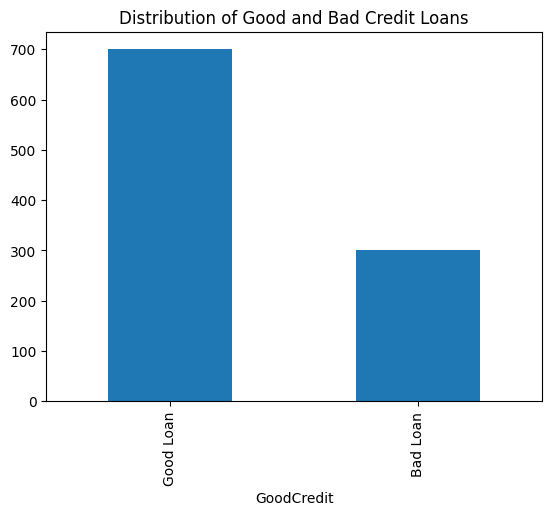

In [18]:
# Visualize distribution of good loans and bad loans

# Use pandas groupby function and size function to count number of rows categorized as good loans and bad loans
groupedData = df.groupby('GoodCredit').size()

# bar chart
ax = groupedData.plot(kind='bar', title='Distribution of Good and Bad Credit Loans')

# change labels for readability
new_labels = ['Good Loan', 'Bad Loan']
ax.set_xticklabels(new_labels)

# display chart
plt.show()

More loans were paid back than not paid back. This means we have a slightly skewed distribution, which might affect some of our machine learning models. 

We want to see how related the columns are to the target variable, GoodCredit. This will help us choose features for our machine learning model to predict loan payback or defaults. We have a mix of categorical data and numerical data, which each have a different way of determining correlation.

I ran out of time to calculate statistical correlation, but I would have tried ANOVA on the numerical data and Chi-Squared test on the categorical data. From there, I would only have selected columns that were statistically significant in their correlation with p-values less than 0.05 to use in the machine learning model. 

One question I have about testing for the relatedness between variables, how do you know when to use ANOVA and when to use a correlation matrix? Are they the same thing? Can you have a correlation matrix show the ANOVA results?

In [84]:
# select correlated columns for machine learning
SelectedColumns = df.columns.tolist()
DataForML=df[SelectedColumns]
DataForML.head()

,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,others,residence,property,age,otherplans,housing,cards,job,liable,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A201


## Process Data for Machine Learning

Most machine learning models do not evaluate non-numerical data. To make our non-numerical data numeric, we have several strategies. For the categorical columns with more than 2 categories and no hierarchy between them, we can use dummy encoding. Dummy encoding adds more columns to the dataframe, one for each category, and fills a row with 0's for the values it is not and 1 with the value that it is. This ensures no hierarchy is assumed between categories, but it adds more columns. If a variable only has two choices, we map binary encoding (0, 1) onto the current categories. If there is an order/hierarchical value to the categories, convert each category to an integer with increasing value (young = 1, adult = 2, middle aged = 3, senior = 4.

In [85]:
# 2 category column conversions. Only one left is "foreigner" after dropping "tele"
DataForML['foreign'] = DataForML['foreign'].replace({'A201':1, 'A202':0})

C:\Users\cassi\AppData\Local\Temp\ipykernel_8224\3113781749.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DataForML['foreign'] = DataForML['foreign'].replace({'A201':1, 'A202':0})


Ordinal data is data where there is a natural order, but no quantifiable difference between values (Bobbitt, 2020). For example, you cannot quantify the difference between 'satisfied' and 'very satisfied', but we know the latter is better than the former. 

So what would a credit predictor model see as a natural order? At first pass I thought 'checkingstatus' and 'savings' would be ordinal, because having 1000 in your checking account is better than 500, which is better than 0. However, we also have a category of 'no checking account'. If we made the data ordinal, the model may discriminate against people without checking accounts (if we gave that category the lowest value) or favor them (if we gave it the highest value). Having a checking account or not is not necessarily related to a person's likelihood on paying back loans. Therefore I ruled out those two columns.

The only other column that seems ordinal is 'employ', as it moves up the number of years working at a current job.

In [86]:
# convert years of employment at current job to ordinal scale
DataForML['employ'] = DataForML['employ'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 })

# See conversions so far
DataForML.head()

C:\Users\cassi\AppData\Local\Temp\ipykernel_8224\3424202981.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DataForML['employ'] = DataForML['employ'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 })


,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,others,residence,property,age,otherplans,housing,cards,job,liable,foreign
0,0,A11,6,A34,A43,1169,A65,5,4,A93,A101,4,A121,67,A143,A152,2,A173,1,1
1,1,A12,48,A32,A43,5951,A61,3,2,A92,A101,2,A121,22,A143,A152,1,A173,1,1
2,0,A14,12,A34,A46,2096,A61,4,2,A93,A101,3,A121,49,A143,A152,1,A172,2,1
3,0,A11,42,A32,A42,7882,A61,4,2,A93,A103,4,A122,45,A143,A153,1,A173,2,1
4,1,A11,24,A33,A40,4870,A61,3,3,A93,A101,4,A124,53,A143,A153,2,A173,2,1


In [87]:
# convert the rest of the categorical columns into dummy columns. 
# Pandas function ignores any numeric columns and only converts columns with object, string, or category datatypes.
DataForML=pd.get_dummies(DataForML)

In [88]:
# Looking at data after conversions
DataForML.head()

,GoodCredit,duration,amount,employ,installment,residence,age,cards,liable,foreign,checkingstatus_A11,checkingstatus_A12,checkingstatus_A13,checkingstatus_A14,history_A30,history_A31,history_A32,history_A33,history_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,status_A91,status_A92,status_A93,status_A94,others_A101,others_A102,others_A103,property_A121,property_A122,property_A123,property_A124,otherplans_A141,otherplans_A142,otherplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174
0,0,6,1169,5,4,4,67,2,1,1,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False
1,1,48,5951,3,2,2,22,1,1,1,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False
2,0,12,2096,4,2,3,49,1,2,1,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False
3,0,42,7882,4,2,4,45,1,2,1,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True,False
4,1,24,4870,3,3,4,53,2,2,1,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False


## Split Data

We are going to use a supervised machine learning model to predict 'GoodCredit'. For supervised learning, we need to split the data into a training set and a test set. We will train the model on 70% of the data and test how well it predicts on the remaining 30% of the data.

In [89]:
# separate the feature variables from the target variable
X = DataForML.drop('GoodCredit', axis=1)
y = DataForML['GoodCredit']

In [90]:
# Use the scikit learn library to split the data into training and testing data
from sklearn.model_selection import train_test_split

# randomly select 70% of the rows as training rows, and 30% as testing rows
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Create Model

For our supervised ML model that predicts loan repayment, I chose to use Support Vector Machines (SVM). SVM is a classification algorithm that finds the n-dimensional hyperplanes that best separate data points into different groups (IBM, 2023). It's goal is to maximize the margin between the hyperplane and the data points on either side (belonging to different groups). This algorithm works well when there are lots of variables influencing the target variable because it builds a separator with as many dimensions as features (hence hyperplane). It tends to be slow on large datasets because all the dimensions requires more processing, but our dataset is fairly small (1000 rows). 

In [91]:
# import support vector machine functionality from scikit-learn library
from sklearn import svm
# initiate model. Here I could tune parameters. Farukh (2020) used the parameters commented out. 
clf = svm.SVC(kernel='rbf') # gamma=0.1,  C=2

# Printing all the parameters of KNN
print(clf)

SVC()


In [92]:
# fit the support vector machine model with the training data
SVM=clf.fit(X_train,y_train)

## Test Model

In [93]:
# test model on test data
prediction=SVM.predict(X_test)

In [94]:
# import metrics library to analyze accuracy of model
from sklearn import metrics

# compare the actual target variable values with the predicted values and print a report on the outcome.
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       199
           1       1.00      0.01      0.02       101

    accuracy                           0.67       300
   macro avg       0.83      0.50      0.41       300
weighted avg       0.78      0.67      0.54       300



Precision and recall are measures of a model's ability to correctly categorize true positives and true negatives (Brownlee, 2020). In this case, it is how well the model puts non-defaulters in the "good" category and doesn't miss any that should be in the "good" category. f1-score is a ratio between precision and recall that shows an overall accuracy of the model. 

The above table shows these metrics for each group, 0 and 1. 

In [95]:
# Focus in on weighted average f1-score as a measure of model accuracy.
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.54


## Cross Validate Model

Measuring the accuracy of the model on one training set and one test set is useful, but it only shows us a limited picture of the performance of the model. New data is going to be different than the training and test data. A way to account for this variability is rotating the chunks of data used for training and used for testing, calculating the f1-score for each round, and then averaging it across every round done. This gives you a better sense of how the model will perform on new data. 

In [96]:
# Import cross validation function from sklearn to assess model performance on multiple training/test sets
from sklearn.model_selection import cross_val_score

# Use our model, SVM, the entire dataset, X and y, split it into 10 chunks to assess, use the weighted f1 score as the metric to assess performance
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)


Accuracy values for 10-fold Cross Validation:
 [0.67965368 0.57647059 0.61480675 0.63486889 0.56666667 0.5992365
 0.56167665 0.63486889 0.60878809 0.61480675]


In [97]:
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Final Average Accuracy of the model: 0.61


We see the model ranged in performance from about 0.56 to about 0.67. The average f1 score is 0.61, which is what we can expect on new data. 

I played a bit with changing the hyperparameters specified when creating the SVM model. No parameters and setting the kernel to 'rbf' gives an accuracy of 0.63. Using the hyperparameters in the example, I got an accuracy of 0.53. I'm not sure why it is less accurate, but that would be a good area for further optimization: systematically choosing the best values to choose for the model parameters.

Next let's normalize our variables to see the effect on the model results. 

In [98]:
# import preprocessing package to normalize data. 
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler uses the minimum and maximum values of each feature to scale the data down to a range between 0 and 1.
PredictorScaler=MinMaxScaler()

# Fit the scaler to the feature variables
PredictorScalerFit=PredictorScaler.fit(X)

# Scale values of feature variables
X=PredictorScalerFit.transform(X)

In [99]:
# redo model training on normalized data

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #, random_state=42

# fit model to data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)
print(metrics.classification_report(y_test, prediction))
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# cross validate model
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       222
           1       0.55      0.53      0.54        78

    accuracy                           0.77       300
   macro avg       0.70      0.69      0.69       300
weighted avg       0.76      0.77      0.76       300

Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.76516129 0.66798419 0.69605263 0.73947368 0.79897355 0.69605263
 0.68221388 0.78666667 0.72043011 0.75665219]

Final Average Accuracy of the model: 0.73


Normalizing the data improved the accuracy from around 0.63 to 0.73, making the model better at classifying loan applicants as good or bad borrowers. 

## References

Bobbitt, Z. (2020, January 3). Levels of Measurement: Nominal, Ordinal, Interval and Ratio. Statology. https://www.statology.org/levels-of-measurement-nominal-ordinal-interval-and-ratio/

Brownlee, J. (2020, February 27). Develop a Model for the Imbalanced Classification of Good and Bad Credit. MachineLearningMastery.Com. https://www.machinelearningmastery.com/imbalanced-classification-of-good-and-bad-credit/

Farukh, H. (2020, September 21). German credit risk classification case study in python—Thinking Neuron. https://thinkingneuron.com/german-credit-risk-classification-case-study-in-python/, https://thinkingneuron.com/german-credit-risk-classification-case-study-in-python/

Hofmann, H. (1994). Statlog (German Credit Data) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5NC77
What Is Support Vector Machine? | IBM. (2023, December 12). https://www.ibm.com/topics/support-vector-machine

